In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize']=(14,8)

In [2]:
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import matplotlib.pyplot as plt

In [4]:
del_df=pd.read_csv("deliveries.csv")
match_df=pd.read_csv("matches.csv")

In [7]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
match_df.shape

(756, 18)

In [9]:
match_df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

## To Predict in which stadium the match has occured how many times

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
 Text(1, 0, 'Maharashtra Cricket Association Stadium'),
 Text(2, 0, 'Saurashtra Cricket Association Stadium'),
 Text(3, 0, 'Holkar Cricket Stadium'),
 Text(4, 0, 'M Chinnaswamy Stadium'),
 Text(5, 0, 'Wankhede Stadium'),
 Text(6, 0, 'Eden Gardens'),
 Text(7, 0, 'Feroz Shah Kotla'),
 Text(8, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
 Text(9, 0, 'Green Park'),
 Text(10, 0, 'Punjab Cricket Association Stadium, Mohali'),
 Text(11, 0, 'Sawai Mansingh Stadium'),
 Text(12, 0, 'MA Chidambaram Stadium, Chepauk'),
 Text(13, 0, 'Dr DY Patil Sports Academy'),
 Text(14, 0, 'Newlands'),
 Text(15, 0, "St George's Park"),
 Text(16, 0, 'Kingsmead'),
 Text(17, 0, 'SuperSport Park'),
 Text(18, 0, 'Buffalo Park'),
 Text(19, 0, 'New Wanderers Stadium'),
 Text(20, 0, 'De Beers Diamond Oval'),
 Text(21, 0, 'OUTsurance Oval'),
 Text(22, 0, 'Brabourne Stadium'),
 Text(23, 0, 'Sardar Patel Stadium, Motera'),
 Text(24, 0, 'Barabati Stadi

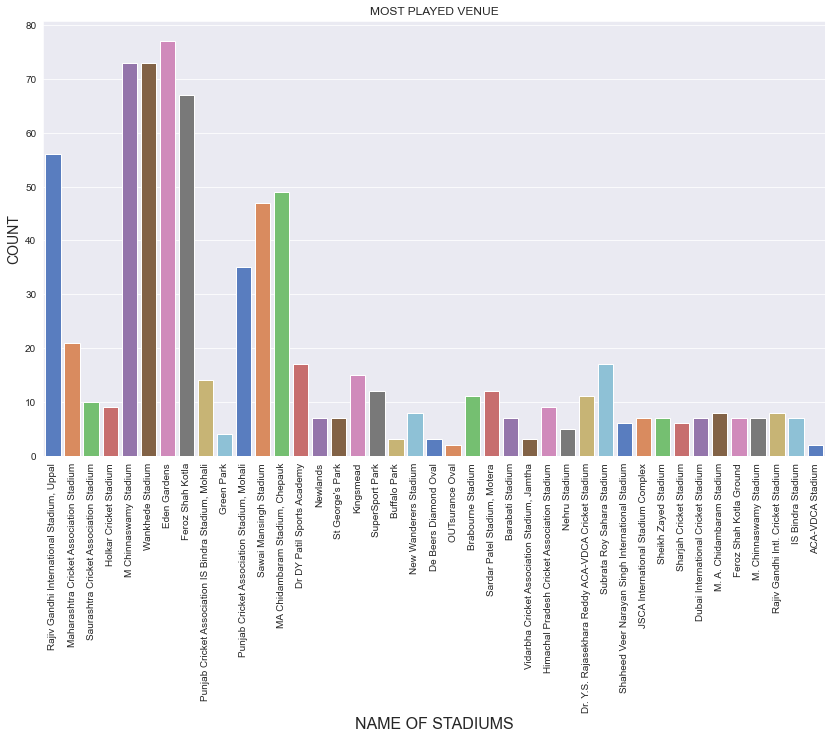

In [22]:
a=sns.countplot('venue',data=match_df,palette='muted')
plt.title('MOST PLAYED VENUE')
plt.ylabel('COUNT',fontsize=14)
plt.xlabel('NAME OF STADIUMS',fontsize=16)
a.set_xticklabels(a.get_xticklabels(),rotation=90)



# ToFind the Number of Matches Won By Each Team Of IPL

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


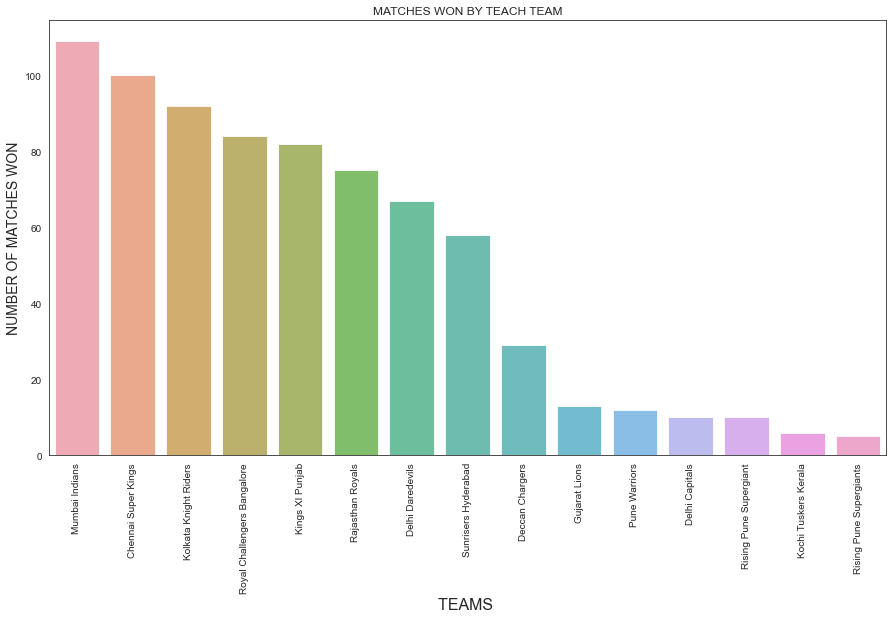

In [33]:


sns.set_style("white")
ls=match_df['winner'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(15,8))
temp=sns.barplot(ls.index,ls.values,alpha=0.8)
temp.set_xticklabels(temp.get_xticklabels(),rotation=90)
plt.title('MATCHES WON BY TEACH TEAM')
plt.ylabel('NUMBER OF MATCHES WON',fontsize=14)
plt.xlabel('TEAMS ',fontsize=16)
plt.show()





## Pie Chart

## To Find the teams who chose batting or balling in Feroz Shah Kotla Stadium won maxium number of times?

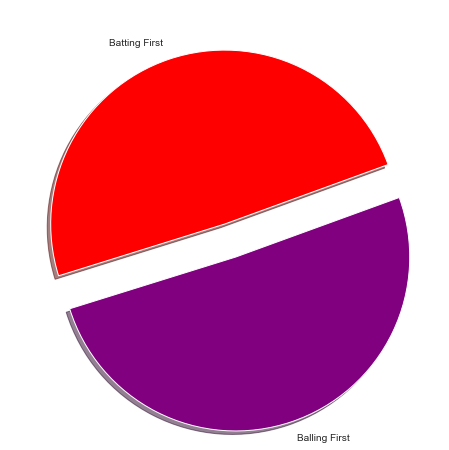

In [42]:
delhi=match_df.loc[(match_df['venue']=='Feroz Shah Kotla')]
# teams win by runs must have chsen batting first
delhirun=delhi[delhi['win_by_runs']>0]
chart=[len(delhirun),len(delhi)-len(delhirun)]
labels=['Batting First','Balling First']
plt.pie(chart,labels=labels,startangle=20,explode=(0,0.2),shadow=2,colors=['red','purple'])
plt.show()


## To predict whether batting or balling is preferrable to win the match in MA CHINDAMBARAM STADIUM in Chennai?

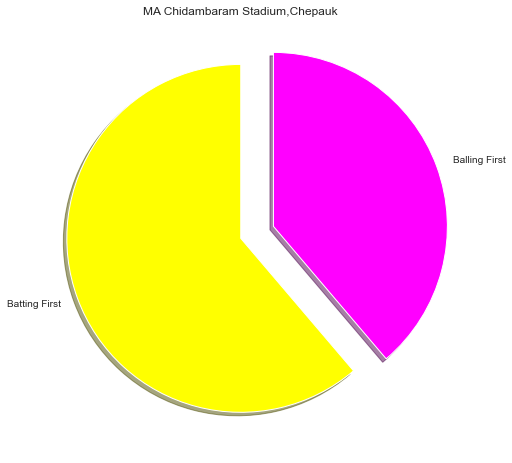

In [62]:
chennai=match_df.loc[(match_df['venue']=='MA Chidambaram Stadium, Chepauk')]
# teams win by runs must have chsen batting first
chennairun=chennai[chennai['win_by_runs']>0]
s=[len(chennairun),len(chennai)-len(chennairun)]
labels=['Batting First','Balling First']

plt.pie(s,labels=labels,startangle=90,shadow=3,explode=(0,0.2),colors=['yellow','magenta'])
plt.title('MA Chidambaram Stadium,Chepauk')
plt.show()

## Win By Wickets

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='win_by_wickets', ylabel='Density'>

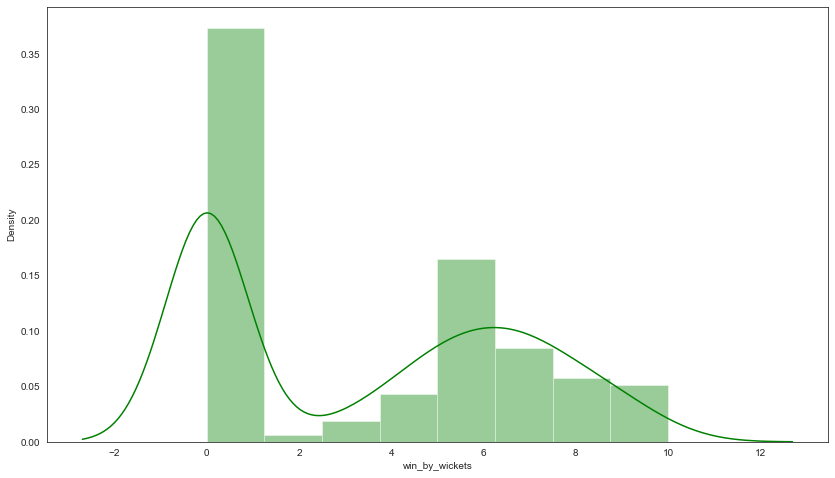

In [92]:
sns.distplot(match_df['win_by_wickets'],color='g')


## Violin Plot To Find the relation between toss decision and win_by_runs

<AxesSubplot:xlabel='toss_decision', ylabel='win_by_runs'>

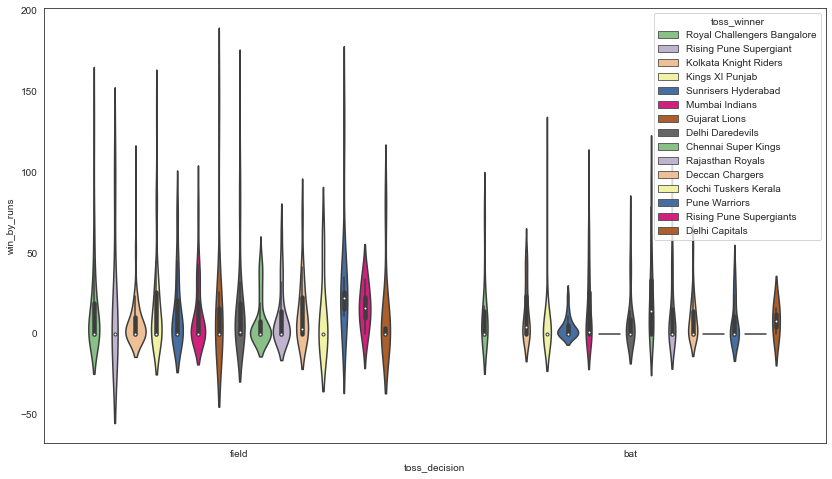

In [98]:
sns.violinplot(x='toss_decision',y='win_by_runs',data=match_df,hue='toss_winner',palette='Accent')

## Pair plot for the given data

## pair plot keeping hue is Venue

In [ ]:
## NOTE: Scroll down to see the pair plot is down due to warnings coming first
import warnings
warnings.filterwarnings("ignore")
sns.pairplot(match_df,hue='venue',palette='dark')

## joint Plot between win_by_wickets and win_runs

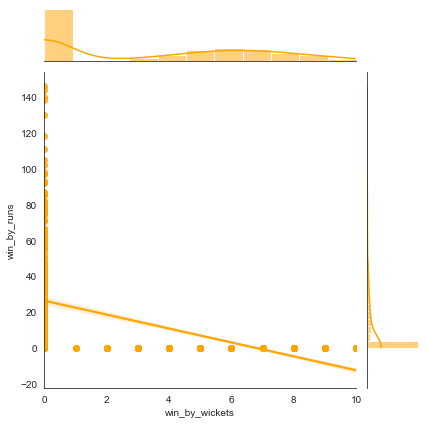

In [127]:
sns.jointplot(x='win_by_wickets',y='win_by_runs',data=match_df,kind='reg',color='orange')

In [128]:
# correlation 
match_df.corr()

,id,dl_applied,win_by_runs,win_by_wickets
id,1.000000,-0.011658,-0.039403,-0.012239
dl_applied,-0.011658,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.011631,-0.560420,1.000000


## Find Correlation of data set match_df using Heat map

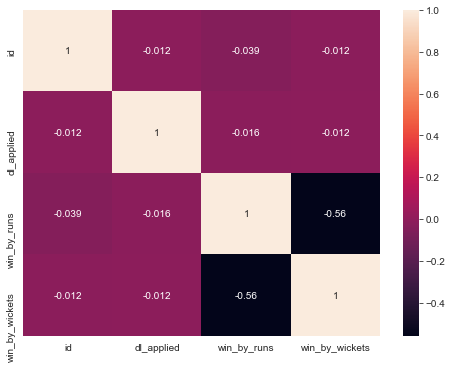

In [135]:
sns.heatmap(match_df.corr(),annot=True)
plt.rcParams['figure.figsize']=(6,5)

## Second dataset of ipl: Deliveries.csv

In [136]:
del_df=pd.read_csv("deliveries.csv")

In [137]:
del_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


## Batsman Performance Analysis

In [128]:
a=del_df.groupby(['batsman_runs','over']).count().reset_index()
a


,batsman_runs,over,match_id,inning,batting_team,bowling_team,ball,batsman,non_striker,bowler,...,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,1,5709,5709,5709,5709,5709,5709,5709,5709,...,5709,5709,5709,5709,5709,5709,5709,305,305,195
1,0,2,5221,5221,5221,5221,5221,5221,5221,5221,...,5221,5221,5221,5221,5221,5221,5221,344,344,241
2,0,3,4673,4673,4673,4673,4673,4673,4673,4673,...,4673,4673,4673,4673,4673,4673,4673,369,369,255
3,0,4,4510,4510,4510,4510,4510,4510,4510,4510,...,4510,4510,4510,4510,4510,4510,4510,380,380,275
4,0,5,4379,4379,4379,4379,4379,4379,4379,4379,...,4379,4379,4379,4379,4379,4379,4379,383,383,278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,7,9,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
140,7,10,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
141,7,18,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
142,7,19,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,0,0,0


In [129]:
a=a.pivot("batsman_runs","over","inning")
a

over,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
batsman_runs,,,,,,,,,,,,,,,,,,,,
0,5709.0,5221.0,4673.0,4510.0,4379.0,4317.0,3718.0,3420.0,3380.0,3231.0,3182.0,3012.0,3141.0,3051.0,2989.0,2819.0,2789.0,2648.0,2479.0,2177.0
1,2192.0,2231.0,2448.0,2525.0,2654.0,2727.0,4076.0,4206.0,4124.0,4216.0,4072.0,4221.0,4034.0,3938.0,3805.0,3791.0,3603.0,3389.0,3030.0,2241.0
2,354.0,349.0,418.0,411.0,393.0,375.0,499.0,531.0,550.0,634.0,653.0,602.0,665.0,657.0,670.0,740.0,703.0,718.0,777.0,772.0
3,35.0,59.0,53.0,42.0,45.0,25.0,29.0,27.0,20.0,17.0,20.0,24.0,24.0,26.0,25.0,18.0,19.0,25.0,20.0,34.0
4,1169.0,1393.0,1480.0,1520.0,1479.0,1485.0,725.0,773.0,814.0,783.0,821.0,838.0,762.0,836.0,929.0,848.0,981.0,960.0,919.0,877.0
5,10.0,9.0,8.0,10.0,5.0,10.0,1.0,2.0,3.0,2.0,2.0,1.0,3.0,3.0,2.0,NaN,4.0,3.0,1.0,NaN
6,134.0,236.0,335.0,361.0,390.0,386.0,235.0,294.0,339.0,300.0,370.0,392.0,444.0,467.0,480.0,545.0,549.0,643.0,638.0,632.0
7,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,5.0


<AxesSubplot:xlabel='batsman_runs'>

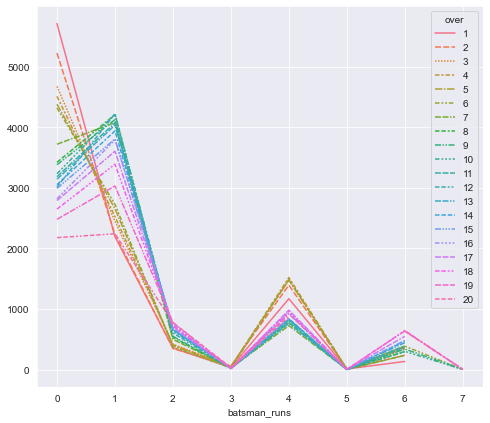

In [130]:
sns.lineplot(data=a)

In [135]:
batsman_grp = del_df.groupby(["match_id", "inning", "batting_team", "batsman"])
batsmen = batsman_grp["batsman_runs"].sum().reset_index()
batsmen = match_df[['id','Season']].merge(batsmen, left_on = 'id', right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [136]:
batsmen

,Season,match_id,inning,batting_team,batsman,batsman_runs
0,IPL-2017,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,IPL-2017,1,1,Sunrisers Hyderabad,DA Warner,14
2,IPL-2017,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,IPL-2017,1,1,Sunrisers Hyderabad,MC Henriques,52
4,IPL-2017,1,1,Sunrisers Hyderabad,S Dhawan,40
...,...,...,...,...,...,...
11330,IPL-2019,11415,2,Chennai Super Kings,MS Dhoni,2
11331,IPL-2019,11415,2,Chennai Super Kings,RA Jadeja,9
11332,IPL-2019,11415,2,Chennai Super Kings,SK Raina,9
11333,IPL-2019,11415,2,Chennai Super Kings,SN Thakur,2


## To analyse Batsman Performance in ipl

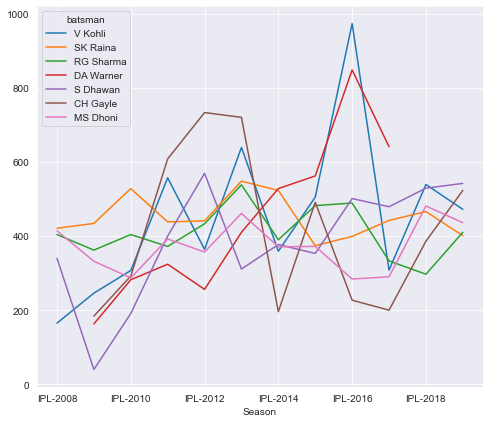

In [138]:
batsman_runsperseason = batsmen.groupby(['Season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()
batsman_runsperseason = batsman_runsperseason.groupby(['Season', 'batsman'])['batsman_runs'].sum().unstack().T
batsman_runsperseason['Total'] = batsman_runsperseason.sum(axis=1)
batsman_runsperseason = batsman_runsperseason.sort_values(by = 'Total', ascending = False).drop('Total', 1)
ax = batsman_runsperseason[:7].T.plot()

## Converting some columns of dataset into numerical type from string

In [10]:
toss_win=[]
toss_win=match_df['toss_winner'].unique()
dic={}
def function(l1):
    for i in range(len(l1)):
        dic[toss_win[i]]=i
function(toss_win)
dic
        

{'Royal Challengers Bangalore': 0,
 'Rising Pune Supergiant': 1,
 'Kolkata Knight Riders': 2,
 'Kings XI Punjab': 3,
 'Sunrisers Hyderabad': 4,
 'Mumbai Indians': 5,
 'Gujarat Lions': 6,
 'Delhi Daredevils': 7,
 'Chennai Super Kings': 8,
 'Rajasthan Royals': 9,
 'Deccan Chargers': 10,
 'Kochi Tuskers Kerala': 11,
 'Pune Warriors': 12,
 'Rising Pune Supergiants': 13,
 'Delhi Capitals': 14}

In [36]:
win=[]
win=match_df['city'].unique()
dic={}
def function(l2):
    for i in range(len(l2)):
        dic[win[i]]=i
function(win)
dic

{'Hyderabad': 0,
 'Pune': 1,
 'Rajkot': 2,
 'Indore': 3,
 'Bangalore': 4,
 'Mumbai': 5,
 'Kolkata': 6,
 'Delhi': 7,
 'Chandigarh': 8,
 'Kanpur': 9,
 'Jaipur': 10,
 'Chennai': 11,
 'Cape Town': 12,
 'Port Elizabeth': 13,
 'Durban': 14,
 'Centurion': 15,
 'East London': 16,
 'Johannesburg': 17,
 'Kimberley': 18,
 'Bloemfontein': 19,
 'Ahmedabad': 20,
 'Cuttack': 21,
 'Nagpur': 22,
 'Dharamsala': 23,
 'Kochi': 24,
 'Visakhapatnam': 25,
 'Raipur': 26,
 'Ranchi': 27,
 'Abu Dhabi': 28,
 'Sharjah': 29,
 13: 30,
 'Mohali': 31,
 'Bengaluru': 32}

In [35]:
def function1(k,match_df):
    for i in range(len(match_df[k])):
        if match_df[k][i] in dic.keys():
            match_df[k][i]=dic.get(match_df[k][i])
function1('winner',match_df)
function1('toss_winner',match_df)
function1('team1',match_df)
function1('team2',match_df)



In [45]:

def function2(a,match_df):
    for i in range(len(match_df[a])):
        if match_df[a][i] in dic.keys():
            match_df[a][i]=dic.get(match_df[a][i])
function2('city',match_df)


In [46]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,0,05-04-2017,0,4,4,field,normal,0,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,1,06-04-2017,5,1,1,field,normal,0,1,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,2,07-04-2017,7,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,3,08-04-2017,1,3,3,field,normal,0,3,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,4,08-04-2017,4,6,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## To find All The Teams Who won both the toss and match 

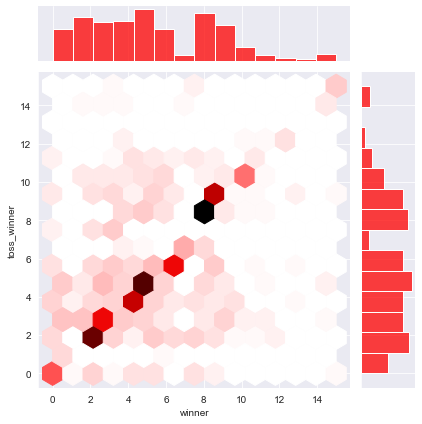

In [26]:
sns.jointplot(x='winner',y='toss_winner',data=match_df,kind='hex',color='red')

## Box Plot to see median, quartiles and skewness for city and win by runs

<AxesSubplot:xlabel='city', ylabel='win_by_runs'>

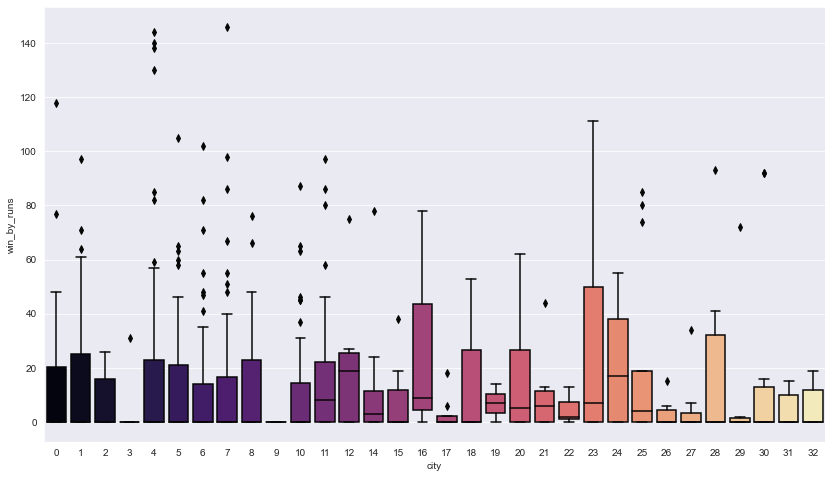

In [58]:
sns.boxplot('city','win_by_runs',data=match_df,palette='magma')

## Hisplot to find max win by wickets and mean of win by wickets

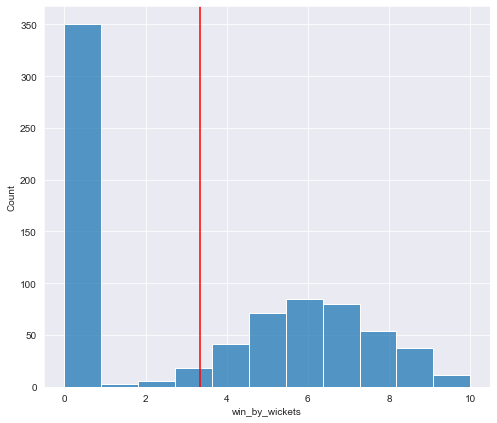

In [94]:
sns.histplot(match_df['win_by_wickets'])
plt.axvline(match_df['win_by_wickets'].mean(),color='red')

## Win_by_runs V/S Venue

<AxesSubplot:xlabel='win_by_runs', ylabel='venue'>

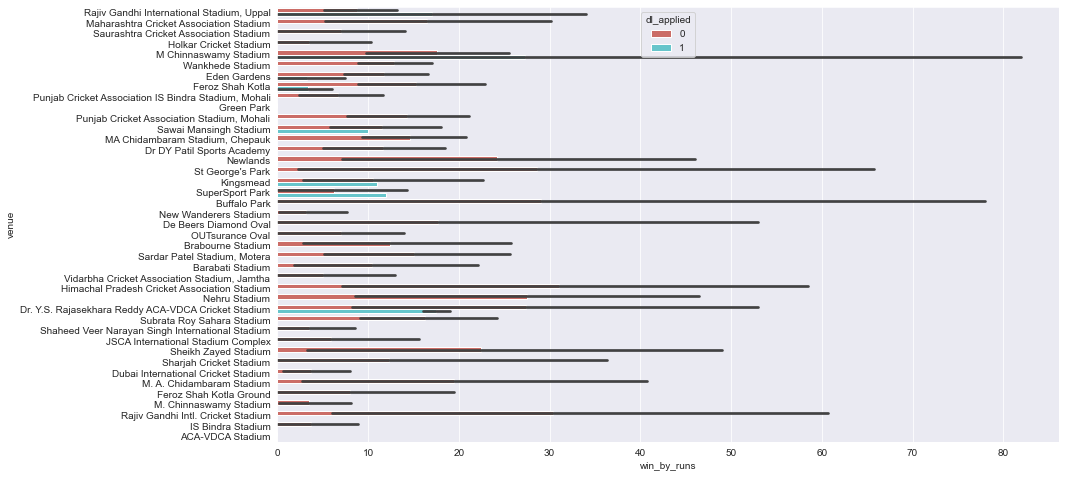

In [73]:
sns.barplot(x='win_by_runs',y='venue',hue="dl_applied",data=match_df,palette='hls')


## SwarmPlot -City V/S  Winner

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 53.2% of the points

<AxesSubplot:xlabel='winner', ylabel='city'>

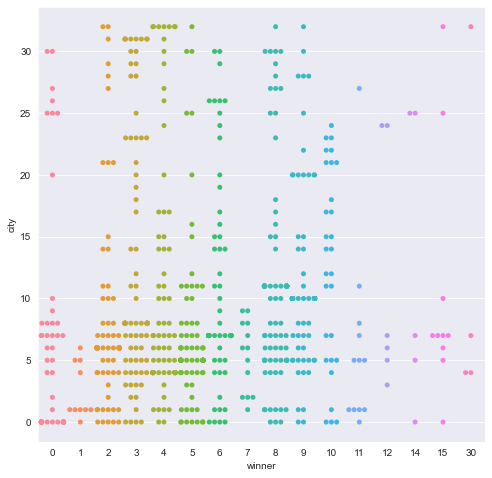

In [139]:
plt.figure(figsize=(8,8))
sns.swarmplot(y='city',x='winner',data=match_df)

In [85]:
ball_df=pd.read_csv("IPL_Ball-by-Ball_2008-2020[1].csv")

## To find the maximum extra runs taake in ipl matches and count of each extra runs 

<AxesSubplot:xlabel='extra_runs', ylabel='count'>

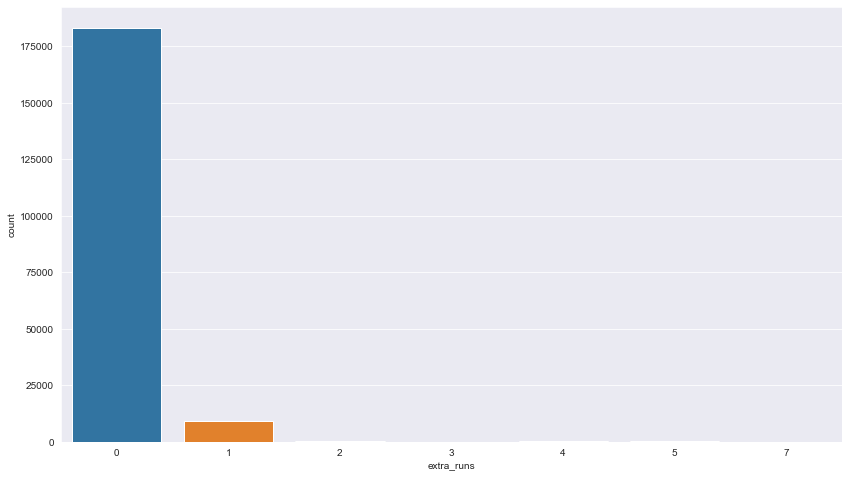

In [82]:
sns.countplot(x='extra_runs',data=ball_df)

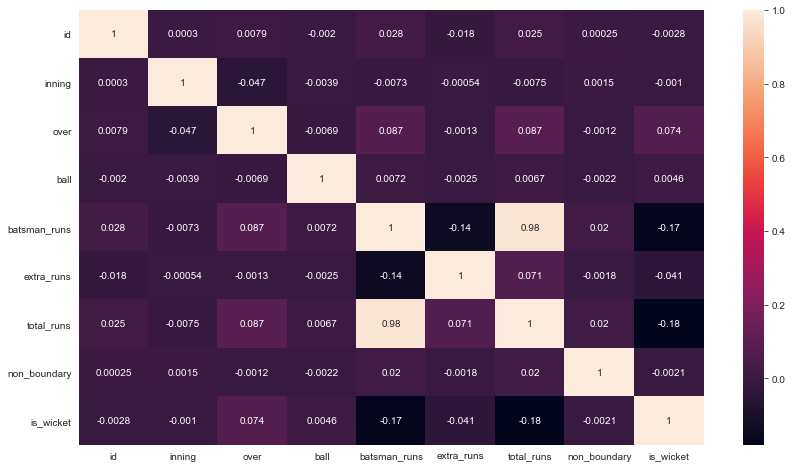

In [84]:
sns.heatmap(ball_df.corr(),annot=True)
plt.rcParams['figure.figsize']=(8,7)

<AxesSubplot:xlabel='toss_winner', ylabel='Density'>

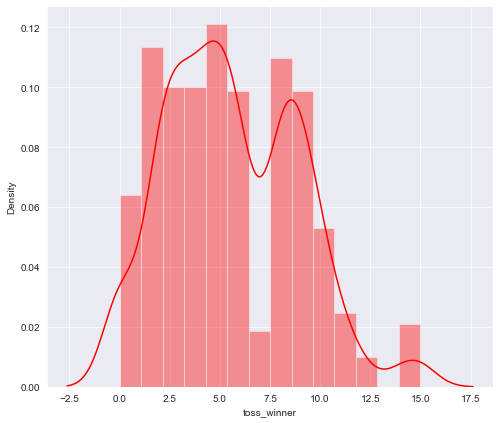

In [143]:
sns.distplot(match_df['toss_winner'],color='r')

In [150]:
batsman_runsperseason

Season,IPL-2008,IPL-2009,IPL-2010,IPL-2011,IPL-2012,IPL-2013,IPL-2014,IPL-2015,IPL-2016,IPL-2017,IPL-2018,IPL-2019
batsman,,,,,,,,,,,,
V Kohli,165.0,246.0,307.0,557.0,364.0,639.0,359.0,505.0,973.0,308.0,539.0,472.0
SK Raina,421.0,434.0,528.0,438.0,441.0,548.0,523.0,374.0,399.0,442.0,466.0,401.0
RG Sharma,404.0,362.0,404.0,372.0,433.0,538.0,390.0,482.0,489.0,333.0,297.0,410.0
DA Warner,NaN,163.0,282.0,324.0,256.0,410.0,528.0,562.0,848.0,641.0,NaN,727.0
S Dhawan,340.0,40.0,191.0,400.0,569.0,311.0,377.0,353.0,501.0,479.0,529.0,542.0
...,...,...,...,...,...,...,...,...,...,...,...,...
IC Pandey,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
J Denly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
P Raj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [180]:
b=[]
b=match_df['Season'].unique()
dic={}
def function3(l3):
    for i in range(len(l3)):
        dic[b[i]]=i
function3(b)
dic

{'IPL-2017': 0,
 'IPL-2008': 1,
 'IPL-2009': 2,
 'IPL-2010': 3,
 'IPL-2011': 4,
 'IPL-2012': 5,
 'IPL-2013': 6,
 'IPL-2014': 7,
 'IPL-2015': 8,
 'IPL-2016': 9,
 'IPL-2018': 10,
 'IPL-2019': 11}

In [182]:
def function3(a,match_df):
    for i in range(len(match_df[a])):
        if match_df[a][i] in dic.keys():
            match_df[a][i]=dic.get(match_df[a][i])
function2('Season',match_df)


In [183]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,0,0,05-04-2017,0,4,4,field,normal,0,0,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,0,1,06-04-2017,5,1,1,field,normal,0,1,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,0,2,07-04-2017,7,2,2,field,normal,0,2,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,0,3,08-04-2017,1,3,3,field,normal,0,3,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,0,4,08-04-2017,4,6,4,bat,normal,0,4,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## To Analyse how toss affected win or loss of a team?

Text(0.5, 1.0, 'Matches won/lost by teams winning toss \nSeason ')

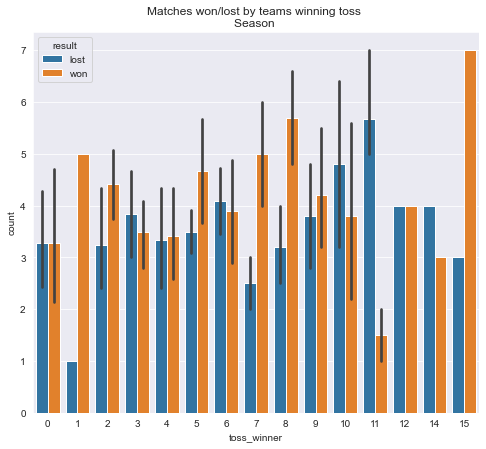

In [208]:
import numpy as np
toss = match_df.groupby(['Season', 'toss_winner']).winner.value_counts().reset_index(name = 'count')
toss['result'] = np.where(toss.toss_winner == toss.winner, 'won', 'lost')
toss_result = toss.groupby(['Season', 'toss_winner','result'])['count'].sum().reset_index()

plot = sns.barplot(x="toss_winner", y="count", hue="result", data=toss_result)
plot.set_title('Matches won/lost by teams winning toss \nSeason ')


**Observation**
Team 15  is the highest team in ipl to win both toss and match together
team 12 i.e. Pune Warriors has equal number of times to win toss and match together and lose toss and win match

## Tosswon Match won V/s toss loss match won

[]

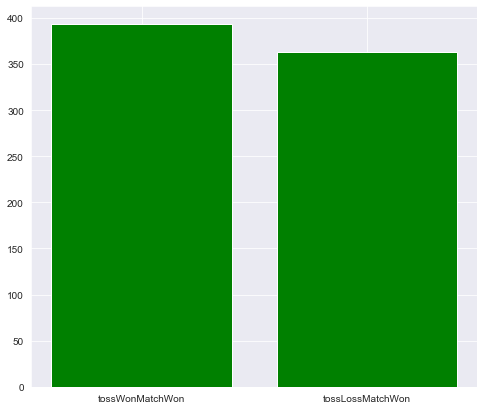

In [203]:
tossWonMatchWon = match_df[match_df['winner'] == match_df['toss_winner']].shape[0]
tossLossMatchWon = match_df.shape[0]-tossWonMatchWon
plt.bar(['tossWonMatchWon','tossLossMatchWon'],[tossWonMatchWon,tossLossMatchWon],color='green')
plt.plot()